In [2]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from q2 import kfold_cv
from dt import DecisionTree, dt_train_test
import argparse
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
print('Hello world')

Hello world


In [3]:
xTrain = pd.read_csv("q4xTrain.csv")
yTrain = pd.read_csv("q4yTrain.csv")
xTest = pd.read_csv("q4xTest.csv")
yTest = pd.read_csv("q4yTest.csv")

In [62]:
RANGE = 6

crit = ['gini'] #, 'entropy']
MD = range(1, RANGE)
MLS = range(1, RANGE)
df = pd.DataFrame(index = pd.MultiIndex.from_product([crit, MD, MLS], names=['criterion', 'Max Depth', 'Min Leaf Samples'])).reset_index()
df

,criterion,Max Depth,Min Leaf Samples
0,gini,1,1
1,gini,1,2
2,gini,1,3
3,gini,1,4
4,gini,1,5
5,gini,2,1
6,gini,2,2
7,gini,2,3
8,gini,2,4
9,gini,2,5


In [63]:
def dtree(criterion, md, mls):
    dt = DecisionTree(criterion, int(md), int(mls))
    trainAcc, testAcc = dt_train_test(dt, xTrain, yTrain, xTest, yTest)
    return [trainAcc, testAcc]

df['TrainAcc', 'TestAcc'] = df.apply(lambda h: dtree(h['criterion'], h['Max Depth'], h['Min Leaf Samples']), axis=1)
df[['TrainAcc', 'TestAcc']] = pd.DataFrame(df['TrainAcc', 'TestAcc'].tolist(), index=df.index)

In [64]:
df.sort_values(by=['Max Depth','Min Leaf Samples'], inplace=True)
df

,criterion,Max Depth,Min Leaf Samples,"(TrainAcc, TestAcc)",TrainAcc,TestAcc
0,gini,1,1,"[0.8641644325290437, 0.8645833333333334]",0.864164,0.864583
1,gini,1,2,"[0.8641644325290437, 0.8645833333333334]",0.864164,0.864583
2,gini,1,3,"[0.8641644325290437, 0.8645833333333334]",0.864164,0.864583
3,gini,1,4,"[0.8641644325290437, 0.8645833333333334]",0.864164,0.864583
4,gini,1,5,"[0.8641644325290437, 0.8645833333333334]",0.864164,0.864583
5,gini,2,1,"[0.8865058087578195, 0.8875]",0.886506,0.887500
6,gini,2,2,"[0.8865058087578195, 0.8875]",0.886506,0.887500
7,gini,2,3,"[0.8865058087578195, 0.8875]",0.886506,0.887500
8,gini,2,4,"[0.8865058087578195, 0.8875]",0.886506,0.887500
9,gini,2,5,"[0.8865058087578195, 0.8875]",0.886506,0.887500


No handles with labels found to put in legend.


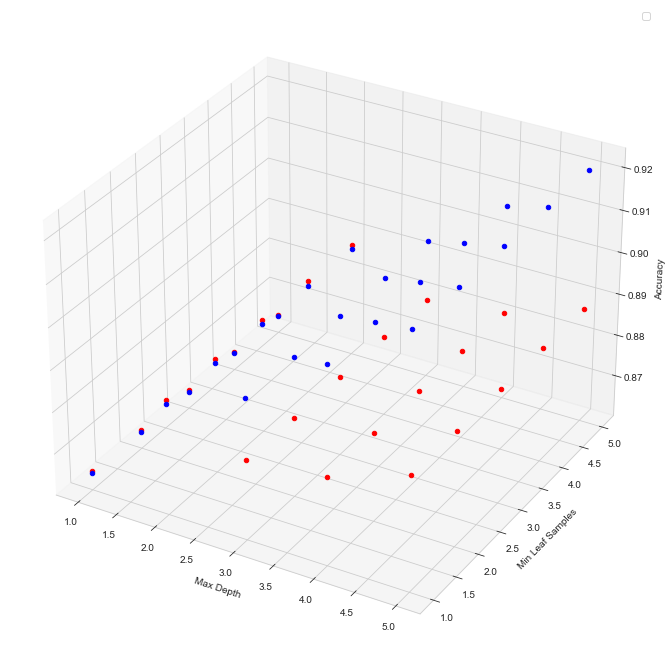

In [65]:
fig = plt.figure(figsize=(9,9))

ax = Axes3D(fig)

x = np.random.uniform(1,20,size=20)
y = np.random.uniform(1,100,size=20)
z = np.random.uniform(1,100,size=20)


ax.scatter(df['Max Depth'], df['Min Leaf Samples'], df['TestAcc'], c='red', marker='o', depthshade=False)
ax.scatter(df['Max Depth'], df['Min Leaf Samples'], df['TrainAcc'], c='blue', marker='o', depthshade=False)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Leaf Samples')
ax.set_zlabel('Accuracy')
ax.legend()
plt.savefig('3dscatter.png')
plt.show()

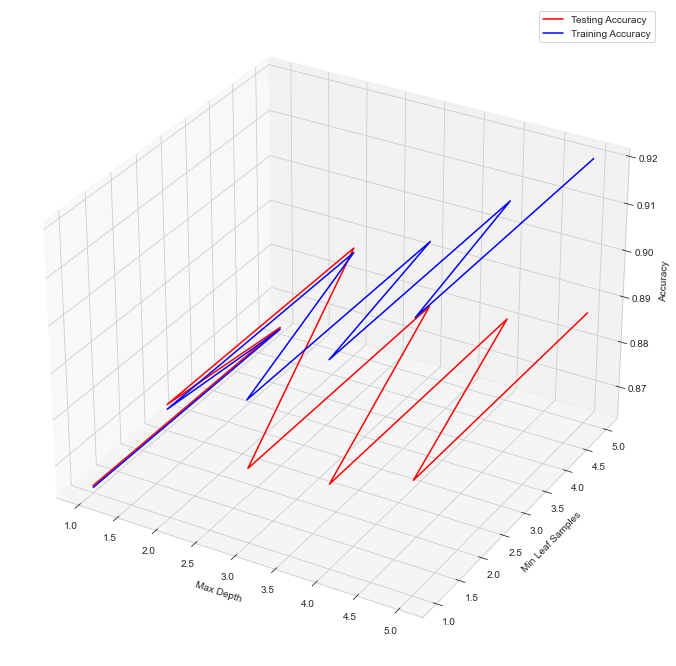

In [66]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

ax.plot(df['Max Depth'], df['Min Leaf Samples'], df['TestAcc'], c='red', label='Testing Accuracy')
ax.plot(df['Max Depth'], df['Min Leaf Samples'], df['TrainAcc'], c='blue', label='Training Accuracy')
ax.legend()
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Leaf Samples')
ax.set_zlabel('Accuracy')
plt.savefig('line3dplot.png')
plt.show()

# Question 1 - Plot

# Question 3

## KNN

In [13]:
d = {
    "k": [i for i in range(1, 25)],
    "test_acc": [kfold_cv(KNeighborsClassifier(n_neighbors=k), xTrain, yTrain, 10)[1] for k in range(1, 25)]
}

In [16]:
df = pd.DataFrame(d)
df

,k,test_acc
0,1,0.707759
1,2,0.721072
2,3,0.737151
3,4,0.743247
4,5,0.744735
5,6,0.746917
6,7,0.749833
7,8,0.749952
8,9,0.754333
9,10,0.752238


In [18]:
bestk = df.loc[df['test_acc'].idxmax()]['k']
int(bestk)

15

## Decision Tree Classifier

In [69]:
aucs = []
for depth in range(1,20):
    for mls in range(1, 20):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=mls)
        trainAuc, testAuc, timeElapsed = kfold_cv(dt, xTrain, yTrain, 10)
        aucs.append((testAuc, depth, mls))

best = max(aucs)
print(f"Best Depth: {best[1]}, Best MLS:{best[2]}")

Best Depth: 19, Best MLS:19
